In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models,datasets,losses
import tensorflow_datasets as tfds

In [8]:
# Chargement des données
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [9]:
train_dataset, test_dataset = dataset['train'], dataset['test']

## Exploration des données

In [10]:
# Les labels
class_names = metadata.features['label'].names

In [12]:
print("Class names: {}".format(class_names))

Class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [13]:
# Le nombre de train set et de test set
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print(f"Number of training examples: {num_train_examples}")
print(f"Number of test examples:     {num_test_examples}")

Number of training examples: 60000
Number of test examples:     10000


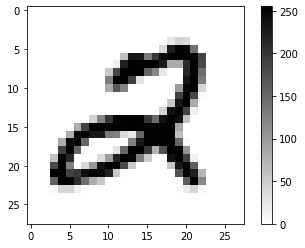

In [15]:
# représentation d'une image
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

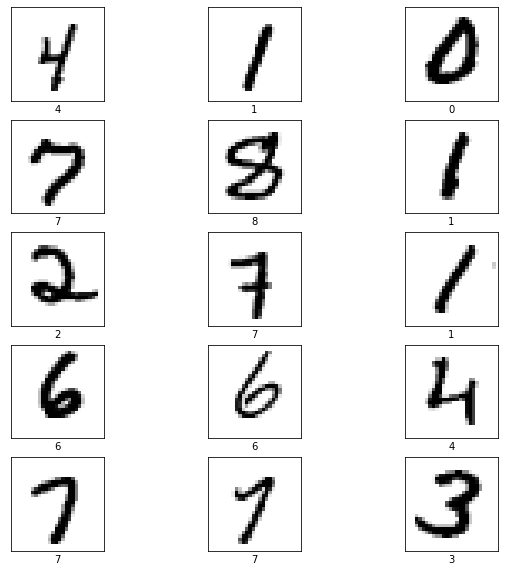

In [16]:
# Représentation des 15 premiers images
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(15)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

In [21]:
## add o padding to match the expected dimensions by LeNet
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [23]:
x_train.shape

TensorShape([60000, 32, 32])

In [29]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)

In [33]:
x_train.shape[1:]

TensorShape([32, 32, 1])

## Construction du model LeNet

In [40]:
model = models.Sequential([
    layers.Conv2D(6, (5,5), activation='tanh', input_shape=x_train.shape[1:]),
    layers.AveragePooling2D(2),
    layers.Conv2D(16, (5,5), activation='tanh'),
    layers.AveragePooling2D(2),
    layers.Conv2D(120, (5,5), activation='tanh'),
    layers.Flatten(),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
    
])

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_2 (Flatten)         (None, 120)              

## Entrainement du model

In [42]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])


In [43]:
history = model.fit(x_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2815 - accuracy: 0.9161
Epoch 2/50
938/938 [==============================] - 3s 4ms/step - loss: 0.1000 - accuracy: 0.9700
Epoch 3/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0641 - accuracy: 0.9806
Epoch 4/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0491 - accuracy: 0.9845
Epoch 5/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0383 - accuracy: 0.9882
Epoch 6/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0325 - accuracy: 0.9897
Epoch 7/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0255 - accuracy: 0.9919
Epoch 8/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0205 - accuracy: 0.9935
Epoch 9/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0182 - accuracy: 0.9941
Epoch 10/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0166 - accuracy: 0.9946

## Test du model

In [44]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0787 - accuracy: 0.9854


[0.07868047058582306, 0.9854000210762024]

## Sauvegarde du model

In [45]:
model.save("LeNetmodel.h5")

## Représentation du Loss et de l'Accuracy

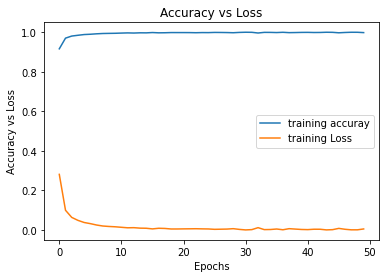

In [46]:
plt.plot(history.history['accuracy'],label = 'training accuray')
plt.plot(history.history['loss'],label = 'training Loss')
plt.title("Accuracy vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy vs Loss")
plt.legend()
plt.show()